# Test di Ipotesi controllo Qualità in R

## Il Fabbricante Sovrappeso

Il fornitore di un certo componente per la produzione di un articolo, garantisce che il peso del componente viene fornito come da specifiche di contratto, e cioè che i pezzi consegnati devono essere al di sotto dei 1000g con una percentuale del 5% come margine di errore massimo.

Quindi il fornitore ad oggi afferma che il 95% delle forniture è ancora conforme al contratto e quindi al di sotto dei 1000g cad. A tale conferma il fabbricante dichiara che il peso medio di questi componenti da lui prodotti è inferiore ai 920g con una deviazione standard di circa 39g, rispettando quindi le specifiche di qualità richieste fino a 2σ.

Tuttavia nell'ultimo anno, nonostante la produzione sia rimasta inviarata in uscita, i componenti in entrata acquistati dal fornitore hanno avuto un incremento significativo. Aumento confermato dal reparto di produzione il quale afferma che: "*i compenti difformi sono anche raddoppiati rispetto all'anno precedente*".

## Hypothesis Testing

Per essere certi che il problema non sia all'interno della nostra azienda, dobbiamo determiniare se l'affemazione fatta dal fabbricante (che i componenti da lui prodotti sono almeno per il 95% sotto i 1000g) sia legittima.

Sia *p* la probabilità di avere i componenti conformi alle specifiche di contratto di fornitura. Quindi dobbiamo verificare le due ipotesi:
- l'ipotesi nulla *H*0: *p* => 0,95 i componenti forniti sono al di sotto dei 1000g
- oppure l'alternativa *H*1: *p* < 0,95 che l'affermazione del fabbricante è falsa

Abbiamo preso 99 componenti a caso come campione, e raccolto i dati del peso e della conformità su un file: *dati_conformità.csv*

Carichiamo il file e cominciamo ad analizzare:

In [1]:
library(RCurl)  # prende il file dal link
library(knitr)  # per kable e visualizzare le tabelle in diversi formati
library(psych) # per statistiche descrittive

conf_file <- getURL("https://raw.githubusercontent.com/LorenzoNegri/Investigazioni-Statistiche-Fornitori/master/Test%20Ipotesi%20controllo%20qualit%C3%A0/01_dati_conformit%C3%A0.csv")
Conf <- read.csv(text = conf_file)

Loading required package: bitops


In [2]:
kable(head(Conf),format = 'pandoc')



 peso_g   peso_conforme
-------  --------------
    998               1
    993               1
    995               1
    995               1
    985               1
    992               1

In alto possiamo vedere le prime del file caricato in R, con *peso_g* ad indicare il peso misurato del campione e a destra con *peso_conforme* un dato binario (0,1) ad indicarci se è *VERO* o *FALSO*.

Di seguito visualizzo delle statistiche di riassuntive.

In [3]:
stats <- describe(Conf)
stats

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
peso_g,1,99,937.7878788,48.7401006,929,938.2222,66.717,856,1015,159,0.04630267,-1.544774,4.89856442
peso_conforme,2,99,0.9191919,0.2739271,1,1.0000,0.000,0,1,1,-3.02969370,7.252608,0.02753071


Nel nostro campione possiamo vedere che la media del peso dei componenti è di 938g con una deviazione standard di 49g. E i pezzi conformi alle specifiche risultano essere il 92%. Lo skewness di 0.0463 indica che l'assimetria della distribuzione dei dati per il peso dei campioni è normale (centrale).

A prima vista pare che le nostre supposizioni riguardo la falsità delle affermazioni del fabbricante siano fondate, tuttavia dobbiamo ancora dimostrarlo.

Di seguito vediamo che alcuni componenti pesano di più di 1000g, e dobbiamo ora dimostrare che tale numero in eccesso sia dovuto al caso oppure che il campione rispecchia la popolazione della fornitura.

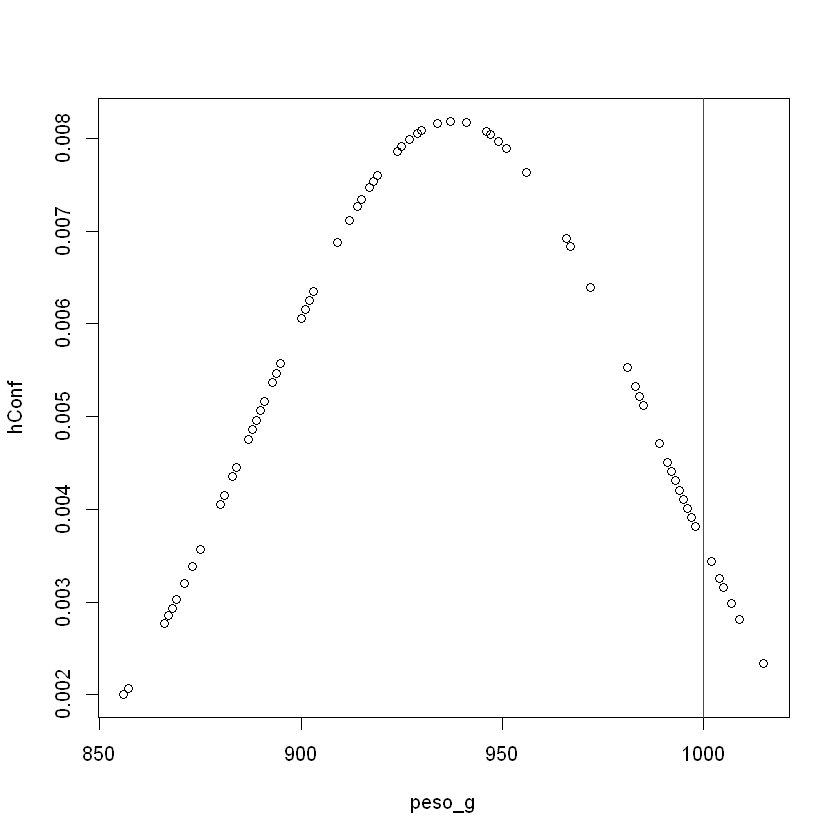

In [4]:
peso_g = Conf[,1]
hConf = dnorm(peso_g, mean = stats[1,3], sd = stats[1,4])
plot(peso_g, hConf)
abline(v=1000, col="red")

## Test Statistico sulle proporzioni

Il campione è normalmente distribuito per cui possiamo procedere con il test statistico.

Calcoliamo prima il livello di significatività α:

In [5]:
# livello di significatività per test a una coda
n = stats[2,2]
alpha = 0.05 # con un livello probabilmente significativo (0.01 sarebbe stato alatamente significativo)
z_alpha = qt(alpha, df = n-1); cat("Il livello di significatività è: ", round(z_alpha, 3))

Il livello di significatività è:  -1.661

Dato che in questo caso stiamo effettuando un test con le proporzioni e non con le medie, la formula per il nostro Z-score sara:

<img src="https://saylordotorg.github.io/text_introductory-statistics/section_12/712af0acd2af8708bb893a1ac9293858.jpg">

Dove ***pbar*** nel nostro caso è la proporzione di campioni conformi al peso; ***p0*** è la proporzione di campioni conformi al peso secondo quanto affermato dal fornitore; ***n*** è l'ampiezza campionaria e ***q*** = (1-***p***).

In [6]:
p0 = 0.95 # la percentuale affermata dal fornitore
q = 1-p0

In [7]:
pbar = stats[2,3] # prelevo la % delle conformità dalle statistiche precedenti
Z = (pbar - p0)/sqrt((p0*q)/n); cat("Lo Z-score è: ", (round(Z,2)))

Lo Z-score è:  -1.41

Così pare che l'affermazione del fornitore sia legittima poiché il valore Z non è significativo essendo più alto rispetto ad α, e rientra nella soglia di accettazione dell'ipotesi nulla *H*0.

## Test Statistico sulle medie

Proviamo ora a verificare se quanto afferma il fabbricante del componente riguardo alla media del peso sia legittima oppure no.
Quindi dobbiamo determinare le ipotesi:
- l'ipotesi nulla *H*0: *μ* = 920g 
- oppure che *H*1: *μ* ≠ 920g

In questo caso abbiamo un test a due code e il livello di significatività avrà valori: -1,96 e +1,96, e utilizzeremo la formula per i test sulle medie:

<img src="https://study.com/cimages/multimages/16/zscoreformulaone.png">

In [8]:
xbar = stats[1,3] # media rilevata dai campioni
μ = 920 # media dichiarata dal fabbricante
σ = stats[1,4] # scarto quadratico medio del peso_g
Z = (xbar - μ)/(σ /sqrt(n)); cat("Lo Z-score è: ", (round(Z,2)))

Lo Z-score è:  3.63

Il risultato è ben oltre i limiti (-1,96 e +1,96). Persino con i valori dei livelli di significatività per un alpha di 0.01 che indicano altamente significativo un range oltre: -2,58 e +2,58. Quindi, poiché il valore Z è oltre la soglia del +2,58, rifiutiamo l'ipotesi nulla H0, e possiamo affermare che le forniture non hanno un peso medio di 920g come dichiarato dal fabbricante.

## Conclusioni

Per spiegare l'aumento dei componenti richiesti per l'assemblaggio, si consiglia di effettuare ulteriori verifiche in magazzino e nel reparto produzione.
Si consiglia anche di richiedere al fornitore un ulteriore analisi su pezzi da lui fabbricati poiché le metriche delle forniture non corrispondono ai dati dichiarati dal fabbricante.